Load Meta-data file and one `.mat` file representing a whole session. Usint metadata and data from session file an experiment (`emgframework.model.model.Experiment`) is created.

`emgframework` is something Patrick is developing in the scope of his IDP. It represents an experiment involving EMG/EEG data and offers some functionality to work with this data.

In [1]:
# These packages enable reloading a module
%load_ext autoreload
%autoreload 2

In [2]:
import os
print os.getcwd()

/home/patrick/GitHub/interdisciplinary_project


In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import emg.data as data
import model.model as model
import emg.display as display
import model.knowledgeBase as kb

In [4]:
metadata = data.read_meta_file('data/P1/P1_AllLifts.mat')

In [5]:
session_data = data.read_session('data/P1/HS_P1_S1.mat')

Creating a Knowledge Base
===

The model is created remotely like you would create a KB in Prolog:
```
experiment = model.Experiment()
subject = model.Subject('subject1')
setup = model.Setup(experiment)

modality = model.Modality(setup, ,'sample rate', 'modality name')
sample = model.Sample(modality, 'sample 1')
...
sample = model.Sample(modality, 'sample n')

session = model.Session(experiment, setup, subject, 'session name')
# Passing on the identifier of the modality is necessary to support multiple recordings from different technologies 
# (EMG, EEG) in one session
# Data can either be a pandas.core.DataFrame, numpy.ndarray or a path to a pickled file containing one of those.
# Additional backends for other file types can be easily added
recording = model.Recording(session, data, identifier, modality.Identifier)
trial = model.Trial(recording, starttime, duration, identfier, label)
tiral.add_marker((time, 'some event'))
...
trial = model.Trial(recording, starttime, duration, identfier, label)
tiral.add_marker((time, 'some event'))
```
In this way the experiment can be modeled. Checkout ``emg/data.py`` for a complex example or ``model.knowledgebase.py`` for some simple ones

In [25]:
markers = ['LEDOn']
experiment = kb.create_emg_eeg_kb(meta=metadata, session=session_data, markers=markers)

In [22]:
print experiment.recursive_to_string()

Experiment: 1 Setups, 1 Sessions, 0 Subjects
Subjects:
Setups:
	Setup setup0: 2 Modalities
		Modality emg: 5 Samples, 4000 Hz
			Sample: First Dorsal Interosseus
			Sample: Brachoradial
			Sample: Anterior Deltoid
			Sample: Flexor Digitorum
			Sample: Common Extensor Digitorum
		
		Modality eeg: 32 Samples, 500 Hz
			Sample: P3
			Sample: Pz
			Sample: O2
			Sample: O1
			Sample: P7
			Sample: P4
			Sample: T8
			Sample: Fz
			Sample: C3
			Sample: TP9
			Sample: C4
			Sample: FC1
			Sample: FC2
			Sample: FC5
			Sample: FC6
			Sample: PO9
			Sample: T7
			Sample: P8
			Sample: PO10
			Sample: Fp1
			Sample: Oz
			Sample: Fp2
			Sample: F3
			Sample: F4
			Sample: F7
			Sample: F8
			Sample: TP10
			Sample: Cz
			Sample: CP1
			Sample: CP2
			Sample: CP5
			Sample: CP6
		
	
Sessions:
	Session session_1: Subject E, Setting setup0, 2 recordings
		Recording eeg_data: 238s duration, 119770 samples, 33 Trials
			Trial eeg_lift0: 8.074000s duration, 4037 samples
				Marker LEDOn at 2.000s
	

DEBUG mode.Recording.get_marker >>>>>>>>>>
trial: emg_lift0 (2.002 ; 10.076)
timer interval given: (0 ; 16)
current slice: (0 ; 8.074)
passed: (None;None)
>>>>>>>>>>

DEBUG mode.Recording.get_marker >>>>>>>>>>
trial: emg_lift1 (9.114 ; 16.524)
timer interval given: (0 ; 16)
current slice: (8.074 ; 15.484)
passed: (None;None)
>>>>>>>>>>

DEBUG mode.Recording.get_marker >>>>>>>>>>
trial: emg_lift2 (15.632 ; 22.702)
timer interval given: (0 ; 16)
current slice: (15.484 ; 22.554)
passed: (None;0.516)
>>>>>>>>>>

DEBUG mode.Recording.get_marker >>>>>>>>>>
trial: emg_lift3 (21.572 ; 28.62)
timer interval given: (0 ; 16)
current slice: (22.554 ; 29.602)
[(2.0, 'LEDOn'), (10.074, 'LEDOn')]


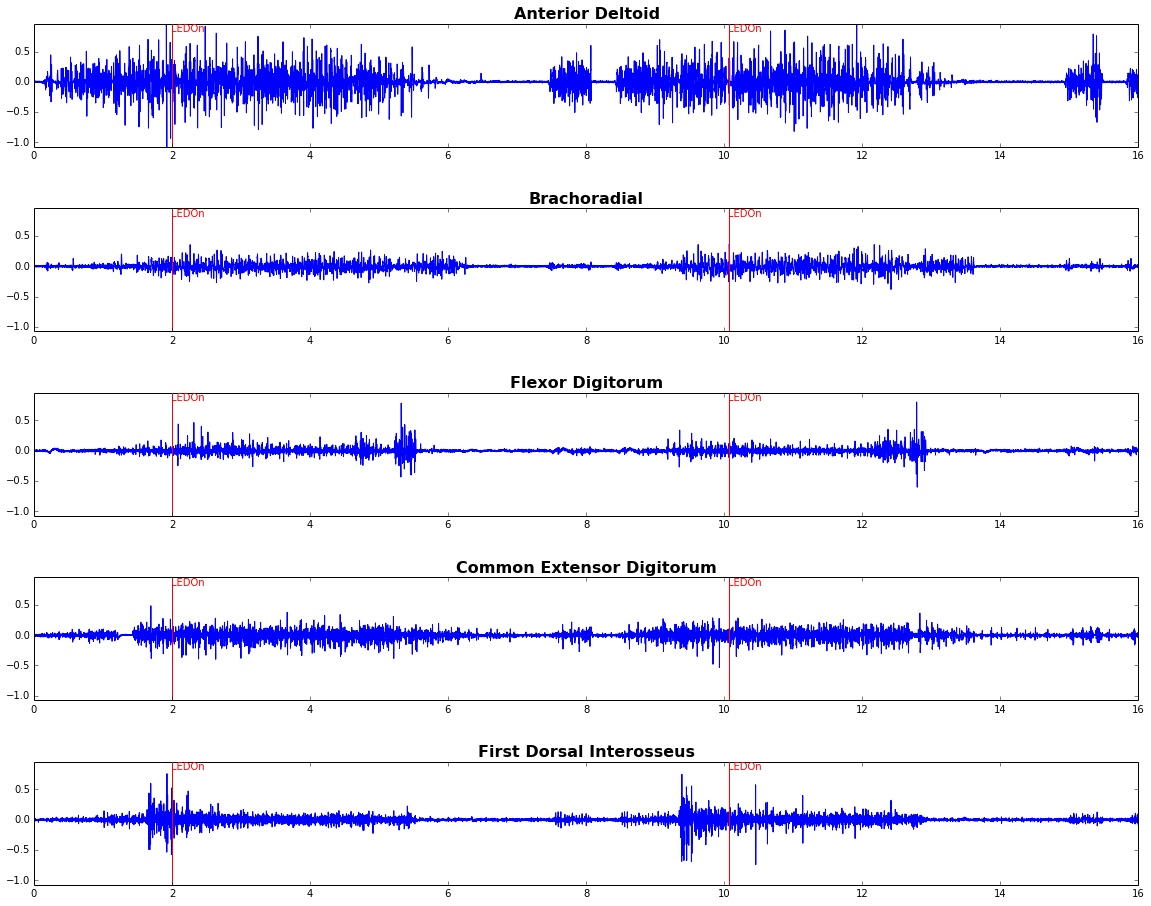

In [28]:
start = 0
stop = 16
display.visualize_modality(model=experiment, start=0, stop=stop, modality='emg')

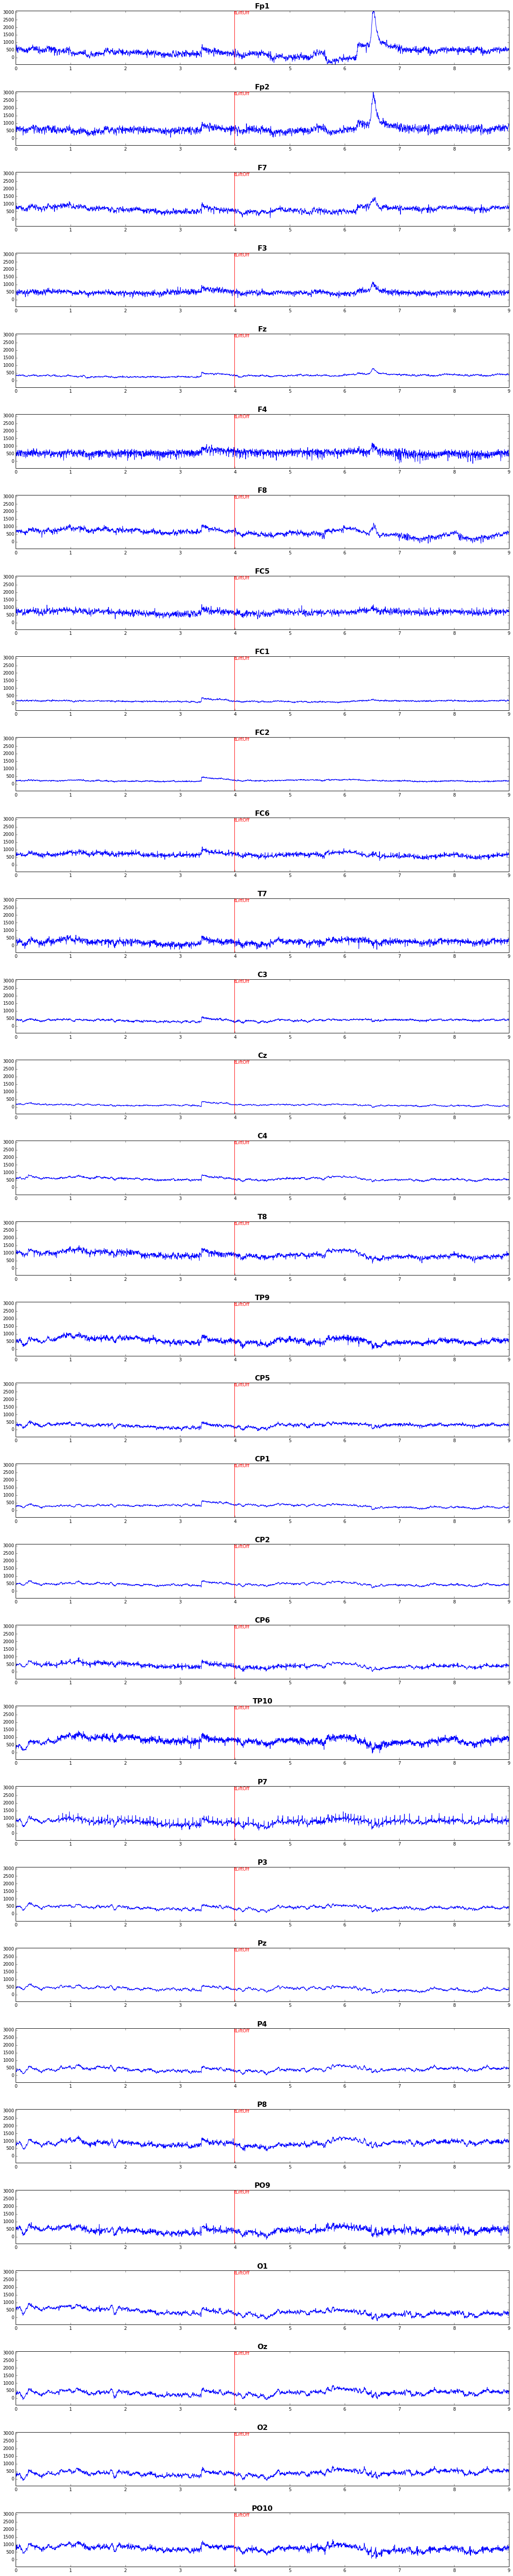

In [21]:
start = 0
stop = 9
display.visualize_modality(model=experiment, start=0, stop=stop, modality='eeg')